In [38]:
import pandas as pd
import numpy as np
import json

import matplotlib.pyplot as plt

from matplotlib.patches import Arc



In [39]:
file_path = 'LPOCRA.json'
with open(file_path, 'r') as file:
    json_data = json.load(file)
    match = pd.DataFrame.from_dict(json_data, orient='index')
    pd.set_option('display.max_columns', 100)
match


def get_name(x):
    if isinstance(x, dict) and 'name' in x:
        return x['name']
    else:
        return None

match['team'] = match['team'].apply(get_name)


[41.0, 9.0] Cracovia Kraków
[64.0, 18.0] Lech Poznan
[9.0, 42.0] Lech Poznan
[54.0, 61.0] Lech Poznan
[13.0, 73.0] Cracovia Kraków
[77.0, 58.0] Lech Poznan
[66.0, 22.0] Lech Poznan
[54.0, 19.0] Cracovia Kraków


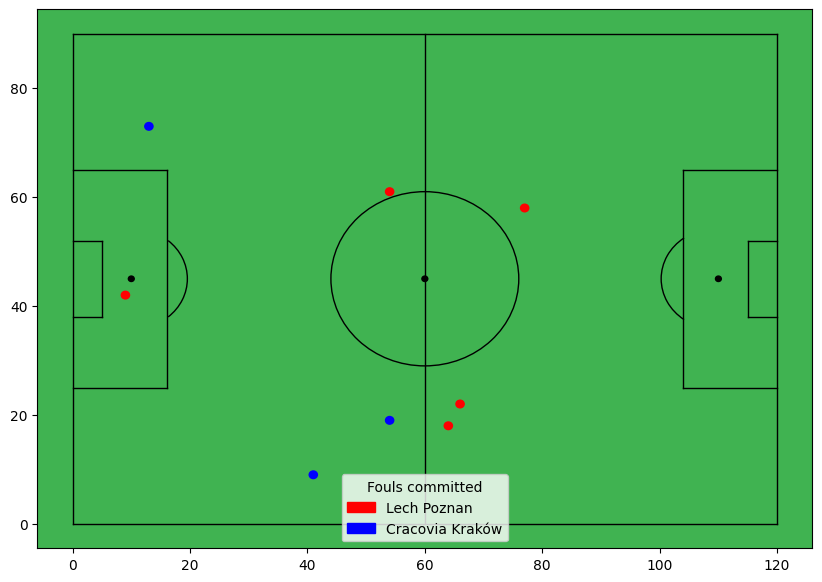

In [40]:
#df.iloc[19:30]
#shots
fig=plt.figure()
ax=fig.add_subplot()

#MainBox
plt.plot([0,0],[0,90], color="black", linewidth=1)
plt.plot([0,120],[90,90], color="black", linewidth=1)
plt.plot([120,120],[90,0], color="black", linewidth=1)
plt.plot([120,0],[0,0], color="black", linewidth=1)

#Centre
plt.plot([60,60],[0,90], color="black", linewidth=1)
centreCircle = plt.Circle((60,45),16,color="black",fill=False, linewidth=1)
centreSpot = plt.Circle((60,45),0.5,color="black")


#LeftPenaltyBox
penaltySpot1=plt.Circle((10,45),0.5,color="black")
leftArc = Arc((10.4,45),height=18.3,width=18.3,angle=0,theta1=310,theta2=50,color="black")
plt.plot([0,16],[25,25], color="black", linewidth=1)
plt.plot([0,16],[65,65], color="black", linewidth=1)
plt.plot([16,16],[25,65], color="black", linewidth=1)
plt.plot([0,5],[38,38], color="black", linewidth=1)
plt.plot([0,5],[52,52], color="black", linewidth=1)
plt.plot([5,5],[38,52], color="black", linewidth=1)

#RightPenaltyBox
penaltySpot2=plt.Circle((110,45),0.5,color="black")
rightArc = Arc((109.4,45),height=18.3,width=18.3,angle=90,theta1=35,theta2=145,color="black")
plt.plot([104,120],[25,25], color="black", linewidth=1)
plt.plot([104,120],[65,65], color="black", linewidth=1)
plt.plot([104,104],[25,65], color="black", linewidth=1)
plt.plot([120,115],[38,38], color="black", linewidth=1)
plt.plot([115,115],[38,52], color="black", linewidth=1)
plt.plot([120,115],[52,52], color="black", linewidth=1)

ax.add_patch(centreCircle)
ax.add_patch(centreSpot)
ax.add_patch(leftArc)
ax.add_patch(rightArc)
ax.add_patch(penaltySpot1)
ax.add_patch(penaltySpot2)


foul_committed=match[match['foul_committed'].notna()]


teamAname = match.loc[match['index'] == 1, 'team'].values

for index, event in foul_committed.iterrows():
    location=event['location']
    team=event['team']
    print(location, team)
    if(team==teamAname):
        drawSpot1=plt.Circle(location,0.7,color="red",fill=True, linewidth=1)
        ax.add_patch(drawSpot1)
        team1name=team
    else:
        drawSpot2=plt.Circle(location,0.7,color="blue",fill=True, linewidth=1)
        ax.add_patch(drawSpot2)
        team2name=team
fig.set_size_inches(10, 7)

ax.set_facecolor((64/255, 179/255, 81/255))

plt.legend(handles=[drawSpot1, drawSpot2], labels=[team1name, team2name], title='Fouls committed')
plt.show()
